In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
num_of_nodes=6
thresholds=[0.3, 0.5, 0.8]
times_data1=[[1089, 977, 906], [748, 647, 605], [785, 754, 746],
             [843, 795, 761], [382, 335, 336], [611, 406, 614]]
times_data2=[[1119, 1068, 963], [664, 615, 516], [607, 523, 453],
             [508, 579, 589], [434, 271, 422], [452, 266, 451]]

In [24]:
def compute_speedup(data_list, thresholds, num_of_nodes):
    res=[]
    for i in range(num_of_nodes):
        speed_up_list=[]

        for t in range(len(thresholds)):
            seq_value=data_list[0][t]
            speed_up=round(float(seq_value)/data_list[i][t], 2)
            speed_up_list.append(speed_up)

        res.append(speed_up_list)
    return res
    

def plot_alg(speedup_data_list, num_of_nodes):
    plt.figure(figsize=(5, 4))

    #plt.title('PySpark parallel algorithm performance')
    plt.ylabel('Speedup')
    plt.xlabel('Number of worker node')

    max_worker_node=num_of_nodes
    max_y=int(np.max(speedup_data_list))+1
    plt.xlim(0, max_worker_node)
    plt.ylim(0, max_y)

    node_plot_col=[i for i in range(0, num_of_nodes+1)]
    
    plt.xticks(node_plot_col)
    plt.yticks(node_plot_col)

    plt.plot(node_plot_col, node_plot_col, color='#F52900', label="Linear speedup")
    plt.fill_between(node_plot_col,
                    [1],
                    alpha=0.3,color="black",label="No improvement zone")
    plt.fill_between(node_plot_col,
                    node_plot_col,
                    alpha=0.1,color="red",label="Sublinear zone")
    plt.fill_between(node_plot_col,
                    node_plot_col,
                    max_worker_node, alpha=0.1, color="green", label="Superlinear zone")

   
    
    speedup_plot_t1=[0]+[speedup_data_list[i][0] for i in range(num_of_nodes)]
    speedup_plot_t2=[0]+[speedup_data_list[i][1] for i in range(num_of_nodes)]
    speedup_plot_t3=[0]+[speedup_data_list[i][2] for i in range(num_of_nodes)]

    plt.plot(node_plot_col, speedup_plot_t1,
                '-x',label="Threshold 0.3 speedup",color="#264653")
    plt.plot(node_plot_col, speedup_plot_t2,
                '-x',label="Threshold 0.5 speedup", color="#2a9d8f")
    plt.plot(node_plot_col, speedup_plot_t3,
                '-x',label="Threshold 0.8 speedup", color="#f4a261")

    plt.grid()
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})
    plt.show()

In [25]:
sp_data1=compute_speedup(times_data1, thresholds, num_of_nodes)
sp_data2=compute_speedup(times_data2, thresholds, num_of_nodes)

Dataset NFCorpus


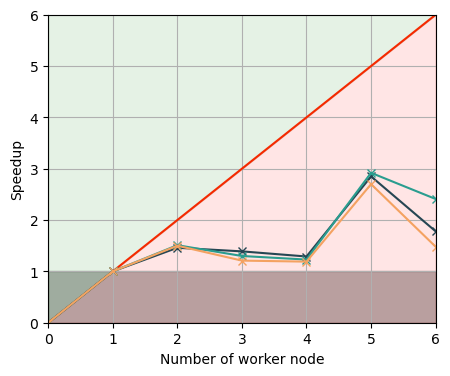

In [26]:
print("Dataset NFCorpus")
plot_alg(sp_data1, num_of_nodes)

Dataset SciFact


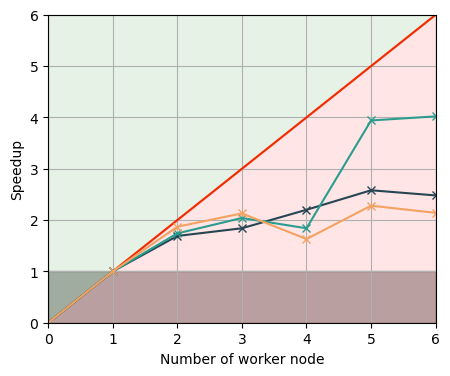

In [27]:
print("Dataset SciFact")
plot_alg(sp_data2, num_of_nodes)